# *Assignment #6*

## **[CSCI 581](https://www.ecst.csuchico.edu/~bjuliano/csci581/)**, Spring 2022

Jayaa Emekar

# Identifying [handwritten digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset in [`sklearn`](https://scikit-learn.org/) has 1,797 samples with 64 numerical features ($8{\times}8$ pixels) and a 10-class target variable representing the digits 0 through 9.

## Overview

The following code gives you an idea of what the [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset looks like:

X.shape = (1797, 64)

digits.images[ 848 ] =
[[ 0.  0.  2. 16. 15.  5.  0.  0.]
 [ 0.  0. 10. 16. 14. 15.  0.  0.]
 [ 0.  0. 15. 10.  0. 16.  7.  0.]
 [ 0.  4. 16.  1.  0. 12.  5.  0.]
 [ 0.  4. 15.  0.  0. 12.  5.  0.]
 [ 0.  5. 16.  6.  0. 16.  0.  0.]
 [ 0.  0. 14. 13.  8. 15.  0.  0.]
 [ 0.  0.  3. 14. 16.  6.  0.  0.]]

y[randDigit] = 0


<Figure size 432x288 with 0 Axes>

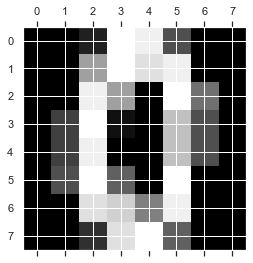

In [1]:
import time
import random as rand
from sklearn.datasets import load_digits
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

rand.seed()
numSamps = 1797
randDigit = rand.randint(0,numSamps)

# Load the Digits dataset
digits = load_digits()

X = digits.data
y = digits.target

# Check shape of X
print( 'X.shape =', X.shape )

# Each image is 8px by 8px that's why 64 pixels
print( '\ndigits.images[',randDigit,'] =' )
print( digits.images[randDigit] )

# Let's check a random target value
print( '\ny[randDigit] =', y[randDigit] )

# Next, let's see how the image looks like
plt.gray() 
plt.matshow(digits.images[randDigit]) 
plt.show()

### Notebook setup

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
# skipping redundant imports and data set saving

# To apply an estimator (classifier) on this data, we flatten the image,
# to transform the data into a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X ,             # (samples,features) matrix
    y ,             # target values
    test_size=0.5 , # 50-50 split
    random_state=int(time.time()))  # randomize by time
    

## Part 1: Classification using a support vector machine

Generate a classification system for this problem using a *Support Vector Machine (SVM)*. You may refer to the [`sklearn_grid_search_digits.ipynb`](https://colab.research.google.com/gist/bjuliano/61e447bb95c4ab4b51288315ce09eeb8/sklearn_grid_search_digits.ipynb) Jupyter notebook example we discussed in class for hyperparameter settings for this estimator.

### Solution

#### Build a Radial Basis Function (RBF) support vector classifier (SVC).

In [3]:
C = 1  # SVM regularization parameter
gamma = 0.001 # Influence range parameter
kernel = 'rbf' # Radial Basis Function

The above parameters are from linked notebook and tuning hyper-parameters for recall

I found below are the best parameters set found on development set where

1. SVM regularization parameter = C = 1
2. Influence range parameter = gamma = 0.001
3. Radial Basis Function = kernel = rbf

The accuracy score for this is 
    0.985 (+/-0.014) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Lets create the support vector classifier (SVC) for above parameters

In [4]:
#Create support vector classifier (SVC) model
model = svm.SVC(kernel=kernel, C=C, gamma=gamma).fit(X, y)

#### Validation using Confusion Matrix  

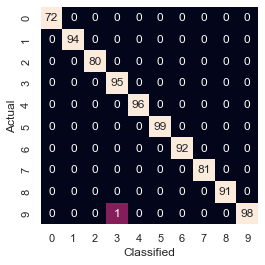

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

expected = y_test
predicted = model.predict(X_test)

mat = confusion_matrix(expected, predicted)
# Due to the high accuracy of this model, 
# I set the vmax parameter on the heatmap below to 3 to make it easier to differentiate 1s from 0s. 
# Consequently, any value above 3 will appear as the same color.
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, vmax=3)
plt.xlabel('Classified')
plt.ylabel('Actual');

Due to the high accuracy of this model, I set the vmax parameter on the heatmap below to 3 to make it easier to differentiate 1s from 0s. Consequently, any value above 3 will appear as the same color.

This is remarkably accurate. 

I've set it up to run based on time seeds, so I don't know the exact number you'll see if you run it now, but I tried around 20 times and saw 0 to 2 errors per run, out of almost 900 classifications per run. Remarkable. Not unexpected given the results of the grid search from the example, but still.  

For a more useful visual, and because this runs fairly quickly, I want to see how a stack of these predicitons with different random seeds would add up. I expect less than double the number of runs 

In [6]:
# NOTE: When running code for this part, 
# the heatmap below MUST have two misclassifications in the described places 
# in order for the code chunks to find their images to work below.
# If misclassification images error out, run only this block until the heatmap
# below shows both misclassifications. 

numSims = 100
cumulativeMat = mat
for i in range(1,numSims):
  # Split the dataset in two equal parts
  X_train, X_test, y_train, y_test = train_test_split(
    X ,             # (samples,features) matrix
    y ,             # target values
    test_size=0.5 , # 50-50 split
    random_state=int(time.time()),  # randomize by time
    stratify = y)  # even splits of each number (not doing what I thought)
  
  # Train Model
  model = svm.SVC(kernel=kernel, C=C, gamma=gamma).fit(X, y)

  # Make predictions (store these and expected in convenient variable)
  predicted = model.predict(X_test)
  expected = y_test

  # Get confusion matrix
  mat = confusion_matrix(expected, predicted)

  # Add confusion matrix to cumulative matrix
  cumulativeMat = np.add(cumulativeMat, mat)



I've separated the slow processing loop from the plot code so I can adjust the plot without waiting for a bunch of models and tests.

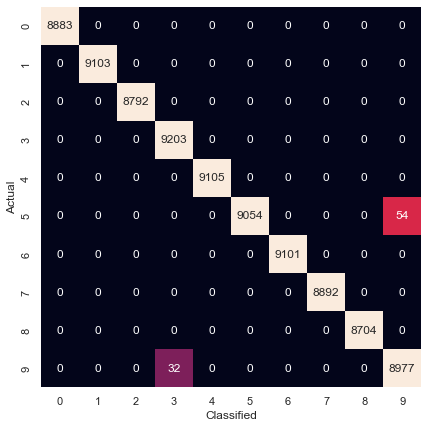

In [7]:
sns.set(rc = {'figure.figsize':(7,7)}) # To accomodate 4 digit numbers
sns.heatmap(cumulativeMat, square=True, annot=True, fmt='d', cbar=False, vmax=numSims)
plt.xlabel('Classified')
plt.ylabel('Actual');

From accumulating 100 iterations of training and testing the model, we can see that although the model is amazingly good, it struggles with a couple of specific use cases.  
*   It occasionally misclassifies a 5 as a 9, and 
*   it occasionally misclassifies a 9 as a 3. 

It is interesting that these classifications are each one-sided. Additionally, there are around half of our number of simulations (fifty-ish) for each error. 

I would hazard a guess that our set has one single object that is labeled as a 5 but is classified by the model consistently as a 9, and one single object that is labeled as a 9 but is classified by the model consistently as a 3. When these two objects are included in the test set, they are classified incorrectly, but when they are in the training set, they don't influence the model enough to cause other mistakes. It could be something else entirely, but this seems like the simplest, most probable explanation.  


In [8]:
misclassified = np.argwhere(expected != predicted)
# array([[642], [671]])

misclassified


array([[617]], dtype=int64)

So we found our two offenders. Let's look at them.

<Figure size 360x360 with 0 Axes>

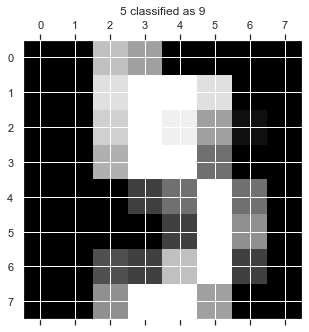

In [9]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.gray()
index = misclassified[0]
plt.matshow(X_test[index].reshape(8,8))
plt.title("%d classified as %d" % (expected[index],  predicted[index]))
plt.show()

In [10]:
index = misclassified[1]
plt.matshow(X_test[index].reshape(8,8))
plt.title("%d classified as %d" % (expected[index],  predicted[index]))
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

Having looked at these two images, I can't really fault a model for getting these two entries wrong. 


## Part 2: Classification using multinomial logistic regression

Generate a classification system for this problem using *multinomial Logistic Regression*. Refer to the [`sklearn_grid_search_digits.ipynb`](https://colab.research.google.com/gist/bjuliano/61e447bb95c4ab4b51288315ce09eeb8/sklearn_grid_search_digits.ipynb) Jupyter notebook example we discussed in class to tune the parameters for your estimator before building a model.

### Find parameters 
Determine optimal parameters for model using grid search.

We can adapt the steps from the referenced notebook by changing model to logistic regression and the tuned_parameters to ones we would tune with logistic regresssion: 
*  Solver: 'newton-cg','lbfgs','sag', 'saga' or 'liblinear'
*  C: np.logspace(-3,1,5) = (.001, .01, .1, 1, 10)
*  Penalty: l1,l2 (only for saga/liblinear solvers)
*  Max_iter: doubled to 200. Convergence still not always achieved, but it slows down a lot when I go higher.



In [ ]:
# Hide all the warnings this cell generates (convergence warnings)
import warnings; warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
  X ,                             # (samples,features) matrix
  y ,                             # target values
  test_size=0.5 ,                 # 50-50 split
  random_state=int(time.time()),  # randomize by time
  stratify = y)                   # even splits of each number?
  # Stratify is not doing what I thought it was supposed to do

# Set the parameters by cross-validation
tuned_parameters = [
    {'solver': ['newton-cg','lbfgs','sag'],
     'C':np.logspace(-3,1,5),
     },
    {'solver': ['saga', 'liblinear'],
     'penalty':['l2','l1'], 
     'C':np.logspace(-3,1,5),
     },
]

scores = [ 'precision' , 'recall' ]

for score in scores:
    print('# Tuning hyper-parameters for %s' % score)
    print()

    clf = GridSearchCV( LogisticRegression(max_iter=200) ,
                        tuned_parameters ,
                        scoring='%s_macro' % score
                      )
    clf.fit( X_train , y_train )

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 0.1, 'solver': 'lbfgs'}

Grid scores on development set:

0.950 (+/-0.013) for {'C': 0.001, 'solver': 'newton-cg'}
0.951 (+/-0.012) for {'C': 0.001, 'solver': 'lbfgs'}
0.953 (+/-0.012) for {'C': 0.001, 'solver': 'sag'}
0.962 (+/-0.021) for {'C': 0.01, 'solver': 'newton-cg'}
0.964 (+/-0.024) for {'C': 0.01, 'solver': 'lbfgs'}
0.964 (+/-0.023) for {'C': 0.01, 'solver': 'sag'}
0.965 (+/-0.018) for {'C': 0.1, 'solver': 'newton-cg'}
0.967 (+/-0.016) for {'C': 0.1, 'solver': 'lbfgs'}
0.964 (+/-0.024) for {'C': 0.1, 'solver': 'sag'}
0.961 (+/-0.023) for {'C': 1.0, 'solver': 'newton-cg'}
0.966 (+/-0.019) for {'C': 1.0, 'solver': 'lbfgs'}
0.964 (+/-0.026) for {'C': 1.0, 'solver': 'sag'}
0.963 (+/-0.025) for {'C': 10.0, 'solver': 'newton-cg'}
0.962 (+/-0.025) for {'C': 10.0, 'solver': 'lbfgs'}
0.964 (+/-0.026) for {'C': 10.0, 'solver': 'sag'}
0.953 (+/-0.012) for {'C': 0.001, 'penalty': 'l2', 'solver': 

Best parameters set found on development set:

96.7% (+/-1.6%) for `{'C': 0.1, 'solver': 'lbfgs'}`

### Build Multinomial Logistical Regression Model  

Using parameters found with grid search.

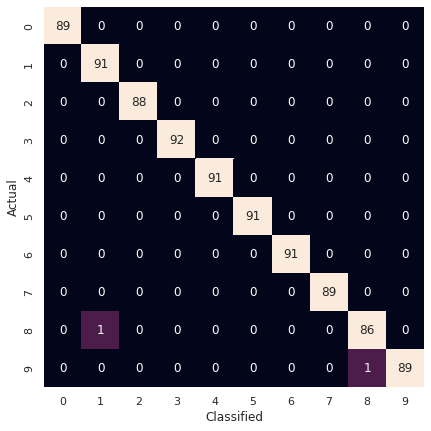

In [ ]:
# NOTE: When running code for this part, 
# the heatmap below MUST have two misclassifications in the described places 
# in order for the code chunks to find their images to work below.
# If misclassification images error out, run only this block until the heatmap
# below shows both misclassifications. 

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
  X ,             # (samples,features) matrix
  y ,             # target values
  test_size=0.5 , # 50-50 split
  random_state=int(time.time()),  # randomize by time
  stratify = y)  # even splits of each number (not doing what I thought)

# Train Model
c2, solver = 0.1, 'lbfgs'
model = LogisticRegression(max_iter=200, solver=solver, C=c2).fit(X, y)

# Make predictions (store these and expected in convenient variable)
predicted = model.predict(X_test)
expected = y_test



### Validation: Confusion Matrices


#### Single Run

In [1]:
# Get confusion matrix
mat = confusion_matrix(expected, predicted)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, vmax=5)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Classified')
plt.ylabel('Actual');

NameError: name 'confusion_matrix' is not defined

This model is also remarkably good, though it seems to not be consistently making the same exact two errors. Let's look at an aggregation of 100 runs of this simulation so we have something to compare to the other one. 

#### Aggregate Run

In [ ]:
cumulativeMat = mat
for i in range(1,numSims):
  # Split the dataset in two equal parts
  X_train, X_test, y_train, y_test = train_test_split(
    X ,             # (samples,features) matrix
    y ,             # target values
    test_size=0.5 , # 50-50 split
    random_state=int(time.time()),  # randomize by time
    stratify = y)  # even splits of each number (not doing what I thought)
  
  # Train Model
  model = LogisticRegression(max_iter=200, solver=solver, C=c2).fit(X, y)

  # Make predictions (store these and expected in convenient variable)
  predicted = model.predict(X_test)
  expected = y_test

  # Get confusion matrix
  mat = confusion_matrix(expected, predicted)

  # Add confusion matrix to cumulative matrix
  cumulativeMat = np.add(cumulativeMat, mat)

Again I will separate the long, slow loop from the plot generation.

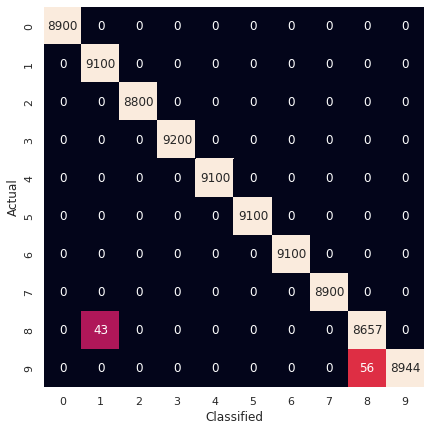

In [ ]:
# Cumulative Diagram
sns.set(rc = {'figure.figsize':(7,7)}) # To accomodate 4 digit numbers
sns.heatmap(cumulativeMat, square=True, annot=True, fmt='d', cbar=False, vmax=numSims)
plt.xlabel('Classified')
plt.ylabel('Actual');

Fascinating. 
I did not see it before, but this model seems to be having a nearly identical issue to the other one, but for a different pair of difficult images. This model seems to classify one image labelled as 8 as a 1 and one image labelled 9 as an 8.

Obviously, our only reasonable course of action is to find these two new offending images. 

In [ ]:
misclassified = np.argwhere(expected != predicted)
misclassified


array([[854],
       [869]])

<Figure size 360x360 with 0 Axes>

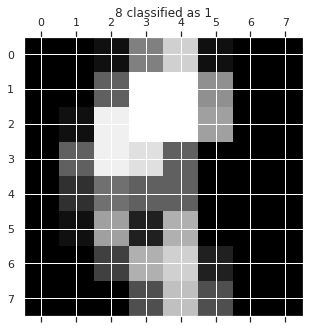

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]
index = misclassified[0]
plt.gray()
plt.matshow(X_test[index].reshape(8,8))
plt.title("%d classified as %d" % (expected[index],  predicted[index]))
plt.show()

Wow. How does any algorithm recognize this as anything? 

I am genuinely baffled that the other model somehow classified this mostrosity correctly. 

<Figure size 360x360 with 0 Axes>

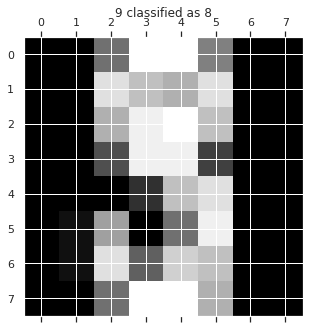

In [ ]:
index = misclassified[1]
plt.gray()
plt.matshow(X_test[index].reshape(8,8))
plt.title("%d classified as %d" % (expected[index],  predicted[index]))
plt.show()

And we have a repeat offender. This is the image the other model classified as 3. I suppose it looks more like a 3 to me than anything. I wonder if some other model would repeatedly classify this as a 5.

## Part 3: Model comparison

*Compare the two models. Which one did better and by how much?*

For model comparison, I used precisions for each letter and overall accuracy when runnig GridSerchCV. 

The above outputs for precision and accuracy shows both models performed very good. The accuracy of support vector machine(SVM) is 99% and that of multinomial logistic regression is 95%. When looking at the precision of each letters, both model classified '0' perfectly. SVM also perfectly classified '2', '3', '4', '8'. One relatively large performance difference is that the precision of SVM for classifying '9' is 97% whereas that of logistic regression is 87%. Overall, both models performed well, but SVM performed better than logistic regression model. 



Normally I would compare the actual numbers here, but given the way we disassembled the misclassifications I think any difference there would actually be misleading because it would only reflect a random variance in which model was more frequently tasked with classifying the two values it couldn't classify. 

The models performed nearly identically. 

Both models consistently failed to correctly classify the same tricky image labelled 9, and each model had one additional tricky image it consistently failed to classify correctly.

Both models therefore have a true accuracy of exactly 1795/1797 or around 99.89%. Both models are so close to perfect that if I had worked on this any less, I would assume I had made some fatal mistake. 

I am not absolutely convinced that I have not made some fatal mistake, at that. However, I have run, tweaked, and re-run the models so much that I am reasonably confident in my assessment of the situation.



## Required components of your submission 

Your *Google Colab* Jupyter notebook must include:

1.   all pertinent *exploratory data analysis* (EDA) code, visualizations, and justifications (if applicable);
2.   explanations/justifications for all model and model parameter selection decisions;
3.   all pertinent model diagnostics, including metrics and visualizations; and
4.   your summary and conclusions pertaining to model performance plus any applicable model comparisons.

Be sure to check out or review the *Assignments/Projects* section of our [*Blackboard*](https://learn.csuchico.edu/) course page for details regarding expectations, requirements, and the [*Jupyter Notebook Rubric*](https://www.ecst.csuchico.edu/~bjuliano/Teaching/rubric-jupyter-notebook.pdf) that will be used to evaluate Jupyter notebook submissions.

